In [26]:
import numpy as np
import matplotlib.pyplot as plt

gravConst = 6.6743 * (10**(-11)) 
mass_sun = 1.989 * (10**30) * np.sqrt(gravConst)
mass_mercury = 3.285 * (10**23)  * np.sqrt(gravConst)
mass_venus = 4.867 * (10**24)  * np.sqrt(gravConst)
mass_earth = 5.972 * (10**24)  * np.sqrt(gravConst)
mass_mars = 6.39 * (10**23)  * np.sqrt(gravConst)
mass_moon = 7.342 * (10**22)  * np.sqrt(gravConst)
distance_mercury = 63.867 * (10**9)
distance_venus = 108.84 * (10**9)
distance_earth = 152.1 * (10**9)
distance_mars = 230.66 * (10**9)
distance_moon = 384.4 * (10**6)
velocity_mercury = 47870
velocity_venus = 35020
velocity_earth = 29300
velocity_mars = 24077
velocity_moon = 1022
offsetspeed = np.array([000, 000, 0])

year = 60 * 60 * 24* 365.2

Defining a general class for a Particle with a mass a position and a velocity.

Where the actual mass is equal to
$$ \frac{self.mass}{\sqrt{G}}$$

In [27]:
class Particle:
    def __init__(self, name, mass, coord, velocity, color):
        self.name = name
        self.mass = mass
        self.coord = np.array([coord["x"], coord["y"], coord["z"]])
        self.velocity = np.array([velocity["x"],velocity["y"], velocity["z"]])
        self.color = color
    
    def accelerate(self, force, dt):
        # delta is the velocity the particle is accelerated by in the timestep dt
        a = force / (self.mass / np.sqrt(gravConst))
        delta = a * dt
        self.velocity = self.velocity + delta

    def move(self, dt):
        # delta is the distance the particle is moved by in the timestep dt
        delta = self.velocity * dt
        self.coord = self.coord + delta

    def kineticEnergy(self):
        return self.mass / 2 * np.linalg.norm(self.velocity)**2

    def potEnergy(self, otherParticle):
        diff = np.subtract(self.coord, otherParticle.coord)
        radius = np.linalg.norm(diff)
        return - self.mass * otherParticle.mass / radius

    def gravityForce(self, other):
        diff = np.subtract(other.coord, self.coord)
        radius = np.linalg.norm(diff)
        f_abs = self.mass * other.mass / (radius**2)
        #return force that applys on self
        return f_abs * (diff/radius) 
    

Create Particles (Solar System)

In [28]:

star = Particle("Sun", mass_sun, {"x": 0, "y": 0, "z": 0 },{"x": 0, "y": 0, "z": 0 }, "#FFEE77" )
#star = Particle("sun", 1000, {"x": 0, "y": 0, "z": 0 },{"x": -0.001, "y": 0, "z": 0 } )
mercury = Particle("Mercury", mass_mercury, {"x": 0, "y": distance_mercury, "z": 0 },{"x": velocity_mercury, "y": 0, "z": 0 }, "#DDCC44" )
venus = Particle("Venus", mass_venus, {"x": 0, "y": distance_venus, "z": 0 },{"x": velocity_venus, "y": 0, "z": 0 }, "#884400" )
earth = Particle("Earth", mass_earth, {"x": 0, "y": distance_earth, "z": 0 },{"x": velocity_earth, "y": 0, "z": 0 }, "#002277" )
mars = Particle("Mars", mass_mars, {"x": 0, "y": distance_mars, "z": 0 },{"x": velocity_mars, "y": 0, "z": 0 }, "#EE1111" )
moon = Particle("Moon", mass_moon, {"x": distance_moon, "y": distance_earth, "z": 0 },{"x": velocity_earth, "y": velocity_moon, "z": 0 }, "#666666")
particles = [star, mercury, venus, earth, mars, moon]
particles = [star, earth, moon]
for pt in particles:
    pt.velocity += offsetspeed

Verlet Algorithm

In [29]:
def verlet(particles, h, steps):
    mmin = np.amin(particles[0].coord)
    mmax = np.amax(particles[0].coord)
    t_axis = np.linspace(0, steps*h, num=steps)
    energy = np.zeros(steps)
    p_axes = []
    for p in particles:
        p_axes.append([np.zeros(steps), np.zeros(steps), np.zeros(steps)])

    for pti in particles:
        for ptj in particles: 
            if ptj == pti:
                break
            force = pti.gravityForce(ptj)
            ptj.accelerate(-force, h/2)
            pti.accelerate(force, h/2)
    for i in range(steps):
        for pt in particles:
            pt.move(h)
        for pti in particles:
            for ptj in particles: 
                if pti == ptj:
                    break
                energy[i] += pti.potEnergy(ptj)
                force = pti.gravityForce(ptj)
                pti.accelerate(force, h)
                ptj.accelerate(force, h)
        for p, pt in enumerate(particles):
            energy[i] += pt.kineticEnergy()
        
            p_axes[p][0][i] = pt.coord[0]
            p_axes[p][1][i] = pt.coord[1]
            p_axes[p][2][i] = pt.coord[2]
            mmin = min(mmin, np.amin(pt.coord))
            mmax = max(mmax, np.amax(pt.coord))
        if i/steps*100%10 == 0: 
            print(i/steps*100,"%")
    fig , ax = plt.subplots()
    
    for p, pt in enumerate(particles):
        ax.plot(p_axes[p][0],  p_axes[p][1], c=pt.color, label=pt.name)
    mmin -= (mmax - mmin) / 25
    mmax += (mmax - mmin) / 25
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.xlim([mmin, mmax])
    plt.ylim([mmin, mmax])
    plt.legend()
    plt.show()

    fig2 , ax2 = plt.subplots()
    ax2.plot(t_axis, energy, 'r-', label='energy')
    
    plt.legend()
    plt.show()



0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


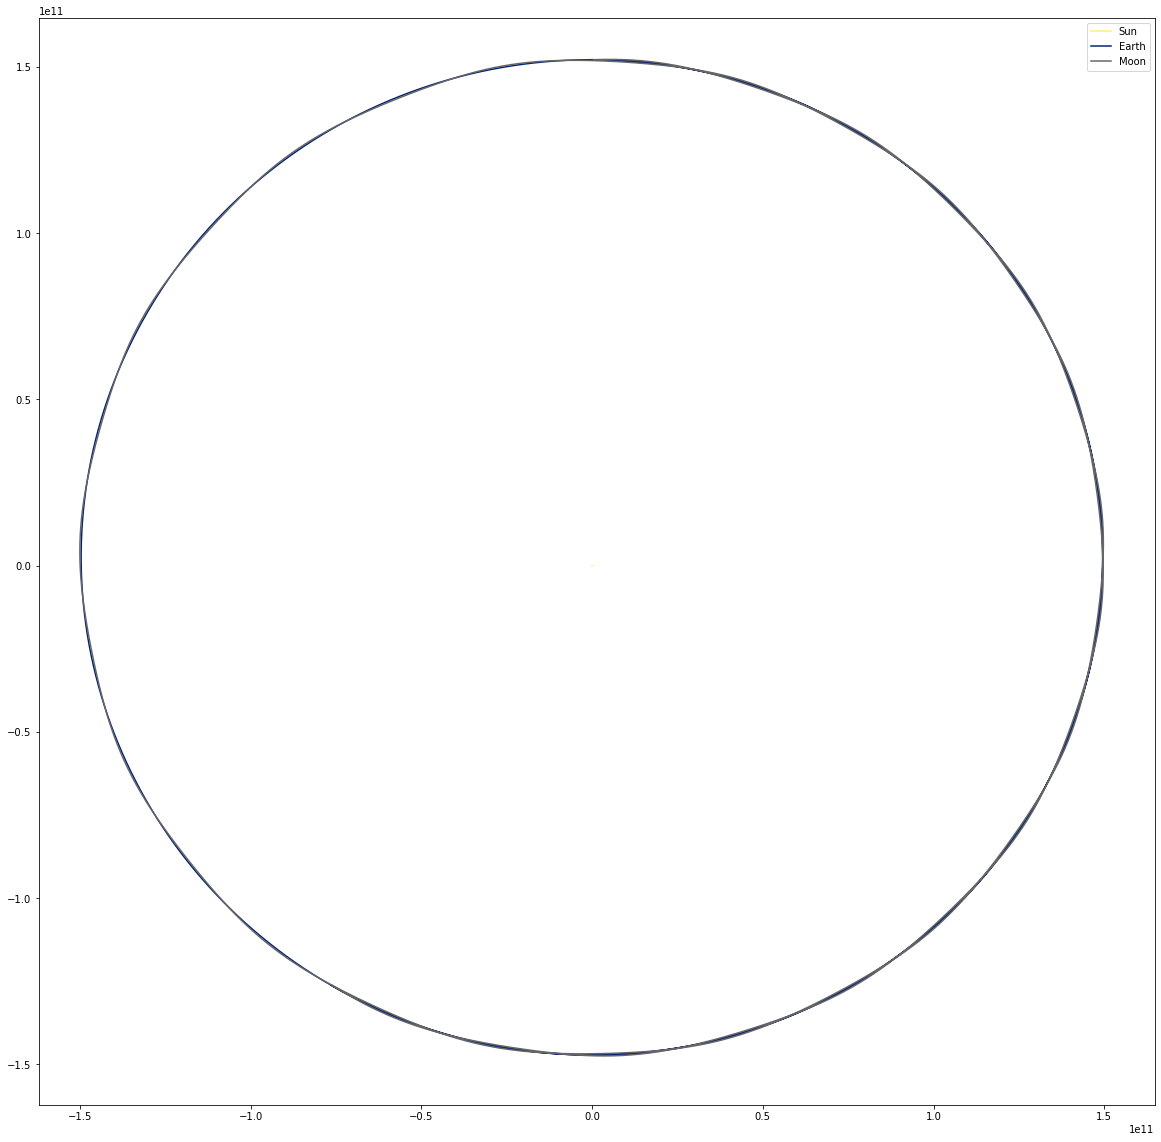

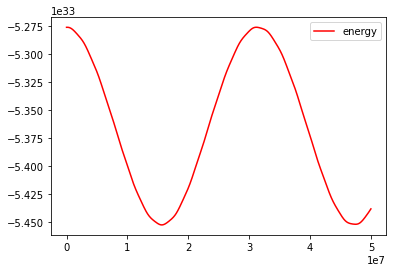

In [30]:

verlet(particles, 500, 100000)
#verlet(particles, 0.1, 60000)